
# Laskuharjoitukset, kierros 2

Palautus 4.3.2022. Jos se on sinun hiihtolomaviikko, voit palauttaa myöhemmin.

$$\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\renewcommand{\bra}[1]{\left\langle{#1}\right|}$$

Kierroksen kaksi tehtävissä eräänä tavoitteena on tutkia miten erilaisten kvanttiporttien operaatiot vaikuttavat kubitin kvanttitilaa esittävään tilavektoriin Blochin pallolla. Sen takia on tärkeää tutkia tehtävien ratkaisuja myös <a href="https://bloch.ollpu.fi/" target="_blank">Blochin palloa kuvaavan simulaation avulla.</a>. 

Osassa tehtäviä voit kirjoittaa sanallisen vastauksen, jossa kerrot vastauksen esitettyyn kysymykseen. 

## Kierroksen 2 oppimateriaaleja

Katso seuraavat videot, joissa havainnollistetaan kvanttilaskennassa käytettyä bra ja ket-vektoriesitystä.



Katso <a href ="https://youtu.be/m77_muSPrs0 " target="_blank">Youtube-video todennäköisyyslaskennan matematiikasta</a>


Katso <a href ="https://youtu.be/Y5WRv_9757A" target="_blank"> kvanttitilojen matemaattiikka ja kahden tilojen superpositio eli yhdistelmätila</a>



Lisätehtävänä hiihtolomalla on myös lukea kierroksen 1 tehtävänä olleen artikkelin <a href="https://drive.google.com/file/d/1O9ZhyggdZhNQS9JIg7TlcIls_mdM4zAi/view?usp=sharing" target="_blank">
 Skrolli-lehden artikkeli "Kvantit horisontissa" </a>. Näin ymmärryksesi kvanttitietokoneiden toiminnasta ja sovelluksista kasvaa.

## Tehtävä 1: yhden kubitin X-portti ja 180 asteen kierto Blochin pallolla x-akselin ympäri

Kvanttitietokoneen muistissa tieto esitetään kubittien avulla. Kertauksena viime kierrokselta, kubitin perustilat ovat $\ket 0$ ja $\ket{1}$, ja ne esitetään pystyvektoreina

$$
\begin{align}
\ket 0 &= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
\ket 1 &= \begin{pmatrix} 0 \\ 1 \end{pmatrix}.
\end{align}
$$

NOT-portin matriisiesitys on seuraava:

$$
X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

Kierroksella 1 laskimme, että kun $X$-portti operoi kubittiin, niin kubitin tila muuttuu käänteiseksi (bit-flip gate), eli

$$
X\ket 0 = \ket 1 \\
X\ket 1 = \ket 0
$$



a) Osoita laskemalla matriisiesitystä (pythonin numpy tai nspire) käyttäen, että

$$
\begin{align}
XX\ket 0 &= \ket 0 \text{ja} \\
XX\ket 1 &= \ket 1
\end{align}
$$

Huomaa, että kahden $X$ matriisin ja pistyvektorin $\ket 0$ tulon laskujärjestys on oikealta vasemmalle. Ensin on siis laskettava tulo $X\ket 0$, ja tämän jälkeen $X \cdot X\ket 0$.

Huomaa, että voit tehdä tehtävän 1 myös Geogebralla, jos et halua tehdä python-ohjelmointia. Ohjeita Geogebran vektori- ja matriisiesityksen tekemiseen löydät kierroksen 1 laskuharjoitusvideosta.

<a href="https://youtu.be/b4ZPvkLIt08?t=2424" target="_blank">Laskuharjoitus 1, Geogebran käyttö</a>





In [3]:
# laske a-kohdan tulot tähän pythonilla, katso esimerkkiä kierroksen 1 ratkaisuista. 
# matriisin ja pystyvektorin tulossa kertomerkki on @
import numpy as np

X =  np.array([[0, 1],[1, 0]])
print("tulostettaan matriisi X:")
print(X)
# määritellään pystyvektorina kubitin kvanttitila 0:
q0 = np.array([[1],[0]])
print("tulostetaan tilavektori q0")
print(q0)
# määritellään pystyvektorina kubitin kvanttitila 1:
q1 = np.array([[0],[1]])

print("tulostetaan tilavektori q1")
print(q1)

# käytä print() komentoa vastauksen tulostamiseen
print("lasketaan tulo X * q0")
print(X@q0)


print("kubitin alkuperäinen tila:")
print(q0)


print("kaksi XX kiertoa:")
print(X@X@q0)



tulostettaan matriisi X:
[[0 1]
 [1 0]]
tulostetaan tilavektori q0
[[1]
 [0]]
tulostetaan tilavektori q1
[[0]
 [1]]
lasketaan tulo X * q0
[[0]
 [1]]
kubitin alkuperäinen tila:
[[1]
 [0]]
kaksi XX kiertoa:
[[1]
 [0]]


b) Osoita laskemalla matriisien tulo, että $XX=I$, missä $I$ on yksikkömatriisi.

$$
I=\pmatrix {1 & 0 \\ 0 & 1}
$$


Tämä tarkoittaa, että $X$ on itsensä käänteismatriisi.

<a href="https://bloch.ollpu.fi/" target="_blank">Blochin pallolla</a> tulos $XX=I$ tarkoittaa, että tilavektoria kierretään kaksi kertaa x-akselin ympäri, jolloin palataan takaisin alkuperäiseen tilaan. Yksikkömatriisi eli identtinen matriisi $I$ on siis kuvaus, joka ei muuta kubitin tilaa.

In [4]:
# Laske b-kohta tähän pythonilla
X =  np.array([[0, 1],[1, 0]])

print("lasketaan tulo XX")
print(X@X)

lasketaan tulo XX
[[1 0]
 [0 1]]


Johdanto c-osaan 180 asteen kierto x-akselin ympäri: Seuraavassa esimerkissä luodaan Qiskitiä käyttäen kvanttipiiri `circuit`, jossa on yksi kubitti, jota operoidaan $X$-portilla.

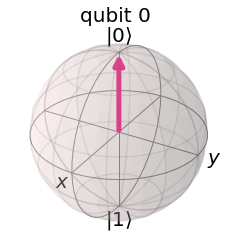

In [5]:
# Otetaan qiskit-kirjasto käyttöön
from qiskit import *
from qiskit.visualization import plot_bloch_multivector


# Luodaan kvanttipiiri muuttujaan circ, jossa on yksi kubitti (diagrammissa q).
circuit = QuantumCircuit(1) # kubitin alkutila on |0>

# Piirretään qubitin kvanttitila blochin pallolle
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)



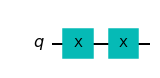

In [7]:
# Operoidaan kubittia 0, eli piirin ainoaa kubittia X-portilla.
circuit.x(0)

# Piirretään luotu piiri.
# Parametri output="mpl" kertoo, että piirto tapahtuu graafisesti.
circuit.draw(output="mpl")


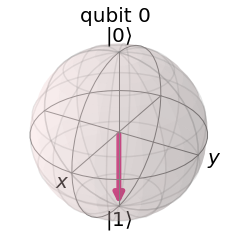

In [5]:
# Piirretään qubitin kvanttitila blochin pallolle uudestaan X portilla operoimisen jälkeen
result = execute(circuit,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

Vertaa Blochin pallolle piirrettyjä tilavektoreita ennen ja jälkeen X -portin operaatiota:
X-portilla operointi kvanttitilaan $\ket 0$ vastaa tilavektorin kiertoa $180^o$ (eli $\pi$ radiaania) X-akselin ympäri. Voit kokeilla <a href="https://bloch.ollpu.fi/" target="_blank">Blochin pallolla</a>.

c) Kirjoita alle yllä olevan esimerkin mukaisesti Python-koodi, joka luo kvanttipiirin, jossa on yksi kubitti alkutilassa $\ket 1$. Piirrä alkutilan tilavektori Blochin pallolle. Sen jälkeen suorita alkutilaan $\ket 1$ yksi $X$-operaatio ja piirrä lopputila Blochin pallolle.  Ohje: Alkutilan $\ket 1$ voit määrittää pythonin metodilla `.initialize(initial_state,0)`, missä `initial_state = [0,1]`. Malli on kierroksen 1 ratkaisuista.

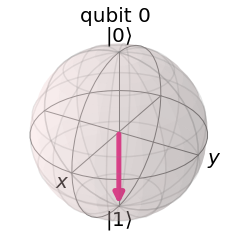

In [8]:
# Kirjoita c-kohdan koodisi tähän

# Luodaan kvanttipiiri muuttujaan circ, jossa on yksi kubitti (diagrammissa q).
circuit2 = QuantumCircuit(1) # kubitin alkutila on |0>
initial_state = [0,1]
circuit2.initialize(initial_state,0)
# Piirretään qubitin kvanttitila blochin pallolle
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit2,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

## Tehtävä 2: yhden kubitin Y ja Z- portit ja kierrot 180 astetta y-akselin ja z-akselin ympäri

Y-portti vastaa kubitin tilavektorin kiertoa Blochin pallolla $180^o$ y-akselin ympäri . Y-portin matriisiesitys on seuraava:

$$
Y=\pmatrix {0 & -i \\ i & 0}
$$

Merkintä $i$ on kompleksilukuihin liittyvä imaginaariyksikkö, jolle on voimassa $i^2 = -1$. 
<a href="http://math.tkk.fi/opetus/p3/04/L/L1printit.pdf" target="_blank">Lisätietoa kompleksiluvuista.</a>

Vastaavasti Z-portti vastaa kubitin tilavektorin kiertoa Blochin  $180^o$ kiertoa z-akselin ympäri. Z-portin matriisiesitys on seuraava:

$$
Z=\pmatrix {1 & 0 \\ 0 & -1}
$$

a) Tutki <a href="https://bloch.ollpu.fi/" target="_blank">havainnollistavan simulaation</a> avulla miten alkutilassa $\ket 0$ oleva tilavektori  kierttyy X, Y, Z porttien vaikutuksesta Blochin pallolla x,y,z-akselien ympäri.

b) Voit ratkaista ohjelmoimalla, tai a-kohdan simulaation avulla: Jos kubitin alkutila on $\ket 0$, niin mikä on kubitin lopputila seuraavien porttien operaatioiden eli kiertojen jälkeen? Kiinnitä huomiota minkä akselin ympäri portti kiertää kubittia, ja vaikuttaako kyseinen kierto kubitin tilaan?
![kubit_xyz.png](images/kubit_xyz.png)

c) Tutustu simulaation avulla myös Hadamard-porttiin eli H-porttiin, joka on 180 asteen kierto xz-tason lävistäjän ympäri!


## Vastaus 
 un alkutilassa q0 olevaa porttia kierretään ensin X -akselin, sitten y-akselin ympäri ollaan takaisin alkutilassa q0, joka on Z-akselin suuntainen. Tällöin pyöräytys vielä Z-akselin ympäri ei muuta tilavektorin asentoa. V: X,Y,Z-kiertojen jälkeen q0 tila on yhä edelleen sama tila.

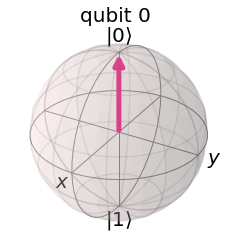

In [9]:
# Tässä voit koodin avulla tutkia tilavektoria Blochin pallolla. 
#Alustetaan kvanttipiiri qc :n yksi kubitti alkutilaan |0>
# Muista aina alustaa piiri uudestaan, jos kokeilet alla eri portteja
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

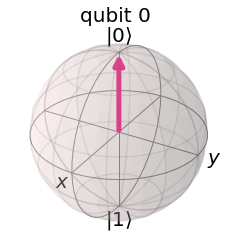

In [10]:
#Tässä voit testailla miten eri portit vaikuttavat tilavektoriin. Muista aina alustaa alkutila \0> 
#suorittamalla yläpuolinen lohko
qc.x(0)
#qc.h(0)
qc.y(0)
qc.z(0)

backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

## Tehtävä 3

Hadamard eli $H$-portti muuttaa kubitin tilat $\ket 0$ ja $\ket 1$ superpositioon seuraavasti:

$$
H\ket 0 = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \ket +   \\
H\ket 1 = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1) = \ket -
$$

Huomaa, että näitä kyseisiä tiloja merkitään välillä myös $\ket +$ ja $\ket -$.

$H$-portin matriisiesitys on seuraava:

$$
H = \frac{1}{\sqrt 2} \pmatrix {1 & 1 \\ 1 & -1}
$$


a) Laske matriisiesitystä (numpy pythonilla) käyttäen tai Geogebralla, että

$$
\begin{align}
H\ket 0 &= \ket + \text{ja} \\
H\ket 1 &= \ket -.
\end{align}
$$


Eli muodosta uudet kantavektorit $\ket +$ ja $\ket +$ kertomalla H-matriisilla alkuperäiset kantavektorit $\ket 0$ ja $\ket 1$ :

$$
\ket + = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \frac{1}{\sqrt 2} \pmatrix {1  \\ 1}  \\
\ket - = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1) = \frac{1}{\sqrt 2} \pmatrix {1  \\ -1 }
$$

Kantavektoreista lisää alla.



In [12]:
# a-kohta pythonilla tähän, arvot voi ilmoittaa float- arvoina eli liukulukuina
import numpy as np
from math import sqrt

H =  1/sqrt(2)*np.array([[1, 1],[1, -1]])
print("H-portti")
print(H)

# määritellään pystyvektorina kubitin kvanttitila 0:
q0 = np.array([[1],[0]])
print("alkutila 0 pystyvektorina", q0)

# määritellään pystyvektorina kubitin kvanttitila 1:
q1 = np.array([[0],[1]])
print("alkutila 1 pystyvektorina: ", q1)

print("H * q0")
print(H@q0)

print("H * q1")
print( H@q1)


H-portti
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
alkutila 0 pystyvektorina [[1]
 [0]]
alkutila 1 pystyvektorina:  [[0]
 [1]]
H * q0
[[0.70710678]
 [0.70710678]]
H * q1
[[ 0.70710678]
 [-0.70710678]]


b) Ratkaise ohjelmoimmalla tai Ttutki <a href="https://bloch.ollpu.fi/" target="_blank">havainnollistavan simulaation</a> avulla : Jos yhden kubitin kvanttipiriissä kubitin alkutila on $\ket 0$, niin mikä on kubitin lopputila seuraavien operaatioiden eli kiertojen jälkeen $HZH$?

c) Millä yhdellä portilla operaatio $HZH$ voidaan korvata?


d) Osoita laskemalla pythonilla matriisien tulo, että $HH=I$, missä $I$ on yksikkömatriisi. Tämä tarkoittaa jälleen, että $H$ on itsensä käänteismatriisi. Kaksi H-portin operaatiota kiertää kubitin tilavektorin takaisin alkuperäiseen tilaan.

e) vapaaehtoinen lisätehtävä:Miten $Y$-portti voidaan esittää porttien $X$,$Z$ $H$ porttien kombinaationa eli yhdistelmänä?

<a href="https://youtu.be/x6gOp_o7Bi8" target="_blank">Lisätietoa: ohjevideo H-portin toiminnasta</a>




## Vastaus
HZH-kierto vastaa yhtä X-kiertoa.

In [14]:
#ohjelmoi d-kohta tähän, tulo oli @-merkki
H =  1/sqrt(2)*np.array([[1, 1],[1, -1]])
print(H)
Z = np.array([[1,0],[0,-1]])
print(Z)

print("HZH")
print(H@Z@H)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[[ 1  0]
 [ 0 -1]]
HZH
[[-2.23711432e-17  1.00000000e+00]
 [ 1.00000000e+00 -2.23711432e-17]]


In [15]:
# vapaaehtoinen e-kohta

print("identiteetti H*H")
print(H@H)

identiteetti H*H
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]


## Matematiikan käsitteitä ja termejä: Matriisin ominaisvektorit ja ominaisarvot

Vektori $\ket v$ on Matriisin $M$ ominaisvektori (eli ominaistila) ja skaalariluku $\lambda$ on ominaisarvo, jos

$$
M\ket v =\lambda \ket v 
$$

Tällöin vektorin $\ket v$ Matriisilla $M$ kertominen on sama kuin kerroittaisiin vektori $\ket v$ skalaariluvulla $\lambda$. 

(Skalaariluku on tavallinen luku, joka ei ole vektori.)


## Tehtävä 4: Z-matriisin ominaisvektorit eli kantavektorit

Z-portin (ns. phase-flip gate) matriisiesitys oli seuraava:

$$
Z=  \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

a) Osoita, että  $\ket 0$ ja $\ket 1$ ovat $Z$-portin ominaisvektoreita eli ominaistiloja, laskemalla Z-matriisin tulot:

$$
\begin{align}
Z\ket 0 = 1\cdot \ket 0 \text{ja}\\
Z\ket 1 = -1 \cdot \ket 1
\end{align}
$$

b) Tutki <a href="https://bloch.ollpu.fi/" target="_blank">havainnollistavan simulaation</a> avulla, miksi emme näe näitä kiertoja Blochin pallolla? Mitkä ovat Z-portin ominaistiloihin liittyvät ominaisarvot? Voit vastata lyhyellä lauseella, ei edellytä ohjelmointia.

Koska Z-portilla ei ole vaikutusta kubitiin, joka on tiloissa $\ket 0$ ja $\ket 1$, muodostavat nämä vektorit ns. Z-portin kannan. Kantavektoreiksi tarvitaan aina 2 ortogonaalista ("eri suuntaista") vektoria, joiden avulla voidaan mikä tahansa Blochin pallolla esitetty kubitin tilavektori esittää.  Kantavektorit voidaan valita hyvin monella eri tavalla, esimerkiksi myös c-kohdan $\ket +$ ja $\ket -$ vektorit muodostavat ortogonaalisen kannan. "ortogonaalinen" esim. xy-tason yksikkövektorit $i$ ja $j$, eli kohtisuorien vektorien pistetulo on nolla ja pituus on 1.

c) Kubittien tilat $\ket +$ ja $\ket -$ määritettiin
$$
 \ket + = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1), \\
 \ket - = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1). 
$$



Osoita,  $\ket +$ ja $\ket -$ ovat X-portin omininaistiloja ja siis kantavektoreita. 
d) Mitkä ovat näihin ominaistiloihin liittyvät ominaisarvot?
e) Miten nämä kierrot ilmenevät Blochin pallolla. Tutki simulaation avulla tai ohjelmoimalla.


In [16]:
#a -kohta
Z = np.array([[1, 0],[0, -1]])
print(Z)
# määritellään pystyvektorina kubitin kvanttitila 0:
q0 = np.array([[1],[0]])

# määritellään pystyvektorina kubitin kvanttitila 1:
q1 = np.array([[0],[1]])
print(q1)

print("lasketaan Z-kierto kubittiin q1")
print(Z@q1)


[[ 1  0]
 [ 0 -1]]
[[0]
 [1]]
lasketaan Z-kierto kubittiin q1
[[ 0]
 [-1]]


ilmoita b-kohdan vastaus tähän kommenttina tai markdown-tekstinä

In [ ]:
# vastaa c-kohta tähän koodina tai selityksenä

## Tehtävä 5

Tehtävät 1 - 4 käsittelivät yhden kubitin systeemiä. Seuraavassa kahdessa tehtävässä tarkastelemme controlled NOT -porttia ($\mathit{CNOT}$), joka on kahden kubitin välinen operaatio. Kahden kubitin kvanttipiirissä systeemin tila esitetään seuraavilla kantavektoreilla:

$$
\ket{00},\ \ket{01},\ \ket{10},\ \ket{11}, 
$$

missä 

$$
\ket{00}=\pmatrix{1 \\ 0 \\ 0 \\0},\ \ket{01}=\pmatrix{0 \\ 1 \\ 0 \\0},\ 
\ket{10}=\pmatrix{0 \\ 0 \\ 1 \\0},\ \ket{11}=\pmatrix{0 \\ 0 \\ 0 \\1}.
$$

$\mathit{CNOT}$-portin operoidessa ensimmäinen qubitti on ns. ohjaava kubitti (control qubi1t), ja jälkimmäinen on kohdekubitti (target qubit). $\mathit{CNOT}$ vaikuttaa koko systeemin tilaan seuraavasti:

$$
\ket{00} \rightarrow  \ket{00}   \\
\ket{01} \rightarrow  \ket{01}   \\
\ket{10} \rightarrow  \ket{11}   \\
\ket{11} \rightarrow  \ket{10}   \\
$$

Tulos tarkoittaa, että jos ensimmäinen, ns. ohjaava kubitti on $0$, niin kohdekubitin tila ei muutu. Jos ohjaavakubitti $1$, niin kohdekubitin tila muuttuu. 

$\mathit{CNOT}$-portin matriisiesitys on seuraava:

$$
\mathit{CNOT} = \pmatrix {1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} 
$$

Huomaa, että vaikka matriisia merkitään monella kirjaimella, se ei ole monen matriisin tulo.

Piirrosmerkki, jossa ylempänä esitetty kubitti on ohjaava, ja alempi toimii kohteena:

![cnot](https://ollpu.fi/kvanttilaskenta-static/cnot.png)

a) Laske CNOT-matriisin ja 2 kubitin tilaa kuvaavan pystyvektorin tulo, ja osoita että 

$$
\ket{01} \rightarrow  \ket{01} \text{eli laske tulo  } \mathit{CNOT} \ket{01}  \\
\ket{10} \rightarrow  \ket{11}  \text{eli laske tulo  } \mathit{CNOT} \ket{10} \\
$$


<a href="https://youtu.be/rLF-oHaXLtE" target="_blank">ohjevideo CNOT-portin toiminnasta</a>


In [18]:
# Ohjelmoi pythonilla tähän tai käytä Geogebraa
import numpy as np

CNOT =  np.array([[1,0, 0,0],[0, 1, 0,0], [0, 0, 0,1], [0, 0, 1,0]])
print(CNOT)
# määritellään pystyvektorina kubitin kvanttitila |00>:
q00 = np.array([[1],[0],[0],[0]])
print(q00)
# määritellään pystyvektorina kubitin kvanttitila |01>:
print("tila 01")
q01 = np.array([[0],[1],[0],[0]])
print(q01)
# |10>

print("tila 10")
q10 = np.array([[0],[0],[1],[0]])
print(q10)
# |11>

q11 = np.array([[0],[0],[1],[0]])
# matriisin ja pystyvektorin tulo numpyssä on @ merkki

print("lasketaan tulo CNOT * 01")
print(CNOT@q01)

print("ohjaava kubitti on 1, eli kohdekubitin tila muuttuu")
print(CNOT@q10)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]
[[1]
 [0]
 [0]
 [0]]
tila 01
[[0]
 [1]
 [0]
 [0]]
tila 10
[[0]
 [0]
 [1]
 [0]]
lasketaan tulo CNOT * 01
[[0]
 [1]
 [0]
 [0]]
ohjaava kubitti on 1, eli kohdekubitin tila muuttuu
[[0]
 [0]
 [0]
 [1]]


 b)-kohta: Suorita alla olevat qiskit koodit, joiden avulla on ohjelmoitu kahden kubitin kvanttipiiri, jossa on CNOT-portti. Simuloi piiri, ja tunnista missä tilanteissa ohjaavakubitti vaihtaa kohdekubitin tilaa. Vertaa piirin toimintaa ket-merkintään:
 
 $$
\ket{01} \rightarrow  \ket{01} \text{eli laske tulo  } \mathit{CNOT} \ket{01}  \\
\ket{10} \rightarrow  \ket{11}  \text{eli laske tulo  } \mathit{CNOT} \ket{10} \\
$$

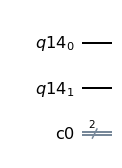

In [19]:
# Valmis esimerkkikoodi tehtävään 1 suoritettavaksi.
# Etene vaiheittain, suorita koodilohkot painamalla Run-nappia ylhäältä.

from qiskit import *

quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register, classical_register)

%matplotlib inline
circuit.draw(output='mpl')

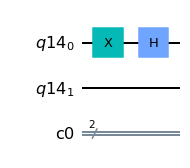

In [20]:
# Lisätään Hadamard-portti H 
circuit.x(quantum_register[0])
circuit.h(quantum_register[0])
circuit.draw(output='mpl')

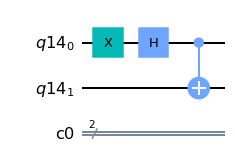

In [21]:
# Lisätään kvanttipiiriin CNOT-portti cx()-komennolla
circuit.cx(quantum_register[0], quantum_register[1])
circuit.draw(output='mpl')

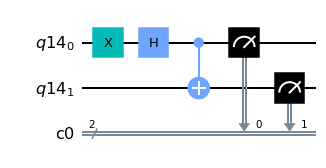

In [22]:
# Mitataan molemmat kubitit, ja tallennetaan tulokset klassiseen rekisteriin
circuit.measure(quantum_register, classical_register)
circuit.draw(output='mpl')

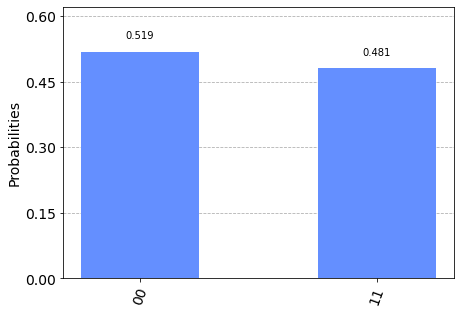

In [23]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

## Vapaaehtoista lisämateriaalia, ei pakollinen: Tehtävä 3 b-kohdan vastauksen tulkintaa, kubitin tilavektori eri kannoissa:

Tehtävän 3 b-kohdan vastaus on, että kolmen portin yhdistelmä HZH voidaan korvata X-portilla:

$X = HZH$

Tulos tarkoittaa, että Z-kannassa (kantavektorien $\ket 0$ ja $\ket 1$) esitetty kubitti kuvautuu H-portilla x-kantaan (kantavektorit $\ket -$ ja $\ket -$), jossa Z-portti suorittaa NOT-operaation. Viimeinen H-portti kuvaa kubitin tilavektorin takaisin z-kantaan.  Sama matriisiesityksenä:

![hzh.png](images/hzh.png)



## Tilavektorin mittaaminen eri kannoissa

Luodaan esimerkissä yhden kubitin kvanttipiiri ja asetetaan kubitti alkutilasta $\ket 0$ operoimalla H-portilla tilojan 
$\ket 0$ ja $\ket 1$ superpositioon, jotka ovat siis käytettyjä kantavektoreita.
$$
H\ket 0 = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1)   
$$

[0.70710678+0.j 0.70710678+0.j]


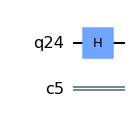

In [35]:
quantum_register = QuantumRegister(1)
classical_register = ClassicalRegister(1)
circuit = QuantumCircuit(quantum_register, classical_register)
circuit.h(quantum_register)

backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
#piirretään tilavektori
print(out_state)

circuit.draw(output='mpl')

Tul0s kertoo, että kubitin tilavektorin kantavektorien $\ket 0$ ja $\ket 1$ kertoimet 0.707 ovat luvun $\frac{1}{\sqrt{2}}$ likiarvoja. Jos kahden vektorin $\ket 0$ ja $\ket 1$ superpositiotila mitataan, niin kubitin lopputilaksi valikoituu 50%:n todennäköisyydellä jompi kumpi klassinen bitti 0 tai 1:

$$
P(0)=P(1)=(\frac{1}{\sqrt{2}})^2=\frac{1}{2}
$$

Mittausten mahdollisten lopputulosten todennäköisyyksien summa on 1: $P(0)+P(1)=1$

Mitataan kubitin tila ja simuloidaan kvanttipiirin toiminta,ja verrataan tuloksia.

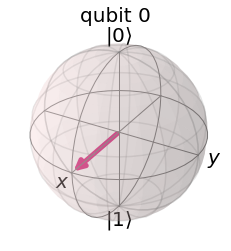

In [37]:
# Huomaa, että On myös mahdollista piirtää tilojen 0 ja 1 yhdistelmä eli superpositiotila
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(out_state)

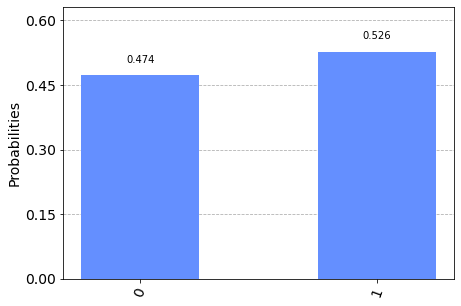

In [36]:
circuit.measure(quantum_register, classical_register)
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))


## Vapaaehtoinen lisätehtävä 6, ei kuulu palautettaviin
a) Luo yhden kubitin kvanttipiiri ja aseta kubitin alkutilaksi $\ket 1$. Mikä on todennäköisyys havaita kubitti tilassa $\ket +$ tai $\ket -$?

b) Jos kubitin alkutilaksi määritetään $\ket +$, niin mikä todennäköisyys havaita mittauksessa tila $\ket -$?



In [ ]:
# koodaa tähän